In [43]:

import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [44]:
# Paths for data.
Ravdees = "C:/Users/hpmsi/OneDrive/Documents/Startup/Ravdees/"
Crema = "C:/Users/hpmsi/OneDrive/Documents/Startup/Crema/"
Tess = "C:/Users/hpmsi/OneDrive/Documents/Startup/TESS Toronto emotional speech set data/"
Savee = "C:/Users/hpmsi/OneDrive/Documents/Startup/Savee/"
# pixbay=r"C:\Users\hpmsi\OneDrive\Documents\Startup\Datasets\pixbay"
# updated=r"C:\Users\hpmsi\OneDrive\Documents\Startup\Datasets\updated"

In [45]:
ravdess_directory_list = os.listdir(Ravdees)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdees + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdees + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head().style.set_properties(**{'background-color':'black','color':'white','border-color':'#8b8c8c'})

In [46]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head().style.set_properties(**{'background-color':'red','color':'white','border-color':'#8b8c8c'})


In [47]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  C:/Users/hpmsi/OneDrive/Documents/Startup/TESS...
1    angry  C:/Users/hpmsi/OneDrive/Documents/Startup/TESS...
2    angry  C:/Users/hpmsi/OneDrive/Documents/Startup/TESS...
3    angry  C:/Users/hpmsi/OneDrive/Documents/Startup/TESS...
4    angry  C:/Users/hpmsi/OneDrive/Documents/Startup/TESS...

In [48]:
df['Emotion'].value_counts()

Series([], Name: Emotion, dtype: int64)

In [49]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[0]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head().style.set_properties(**{'background-color':'green','color':'white','border-color':'#8b8c8c'})

In [50]:
## Create a dataframe
df = pd.DataFrame()
df['Emotion'] = labels
df['Path'] = paths
df.head().style.set_properties(**{'background-color':'yellow','color':'black','border-color':'#8b8c8c'})

In [51]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  C:/Users/hpmsi/OneDrive/Documents/Startup/Ravd...
1  neutral  C:/Users/hpmsi/OneDrive/Documents/Startup/Ravd...
2  neutral  C:/Users/hpmsi/OneDrive/Documents/Startup/Ravd...
3  neutral  C:/Users/hpmsi/OneDrive/Documents/Startup/Ravd...
4     calm  C:/Users/hpmsi/OneDrive/Documents/Startup/Ravd...

In [52]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


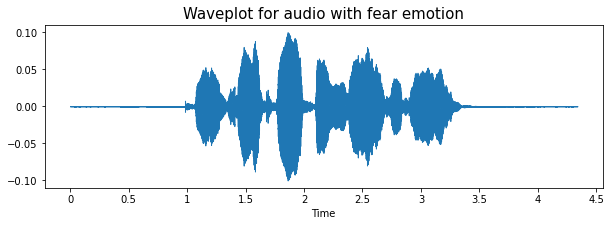

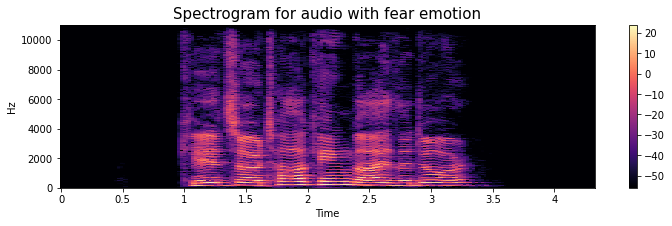

In [53]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

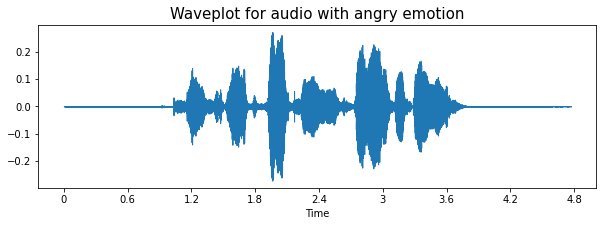

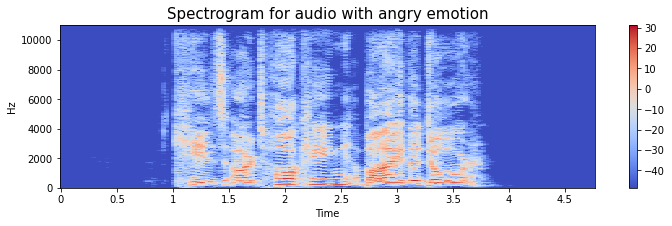

In [54]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

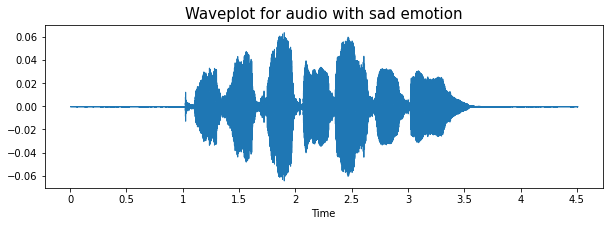

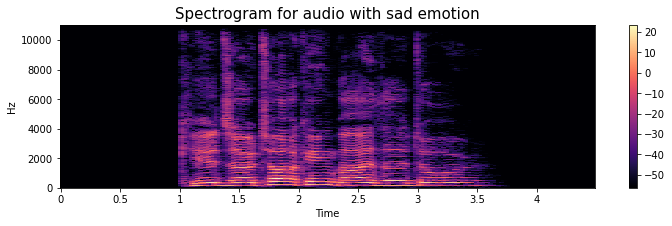

In [55]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

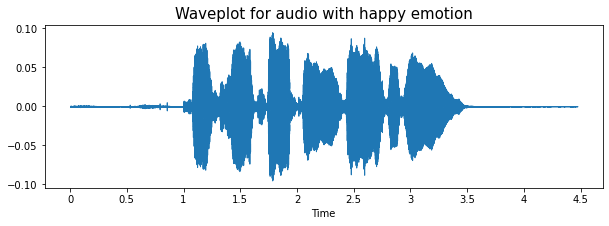

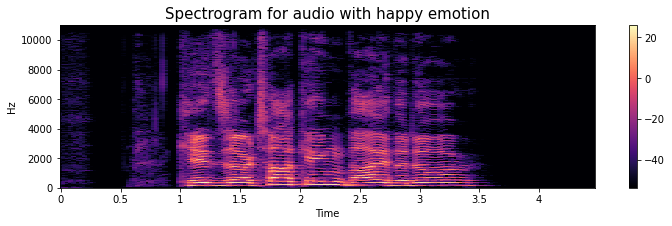

In [56]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# DATA AUGMENTATION

In [57]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

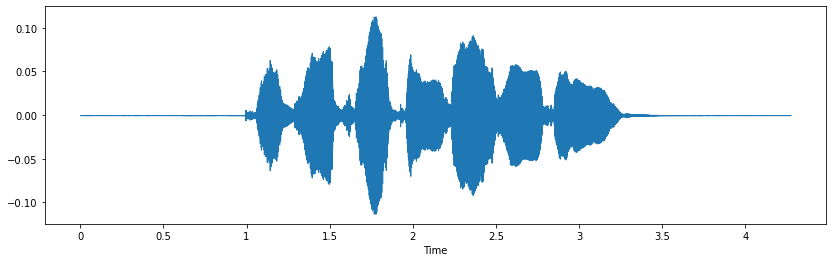

In [58]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

22050


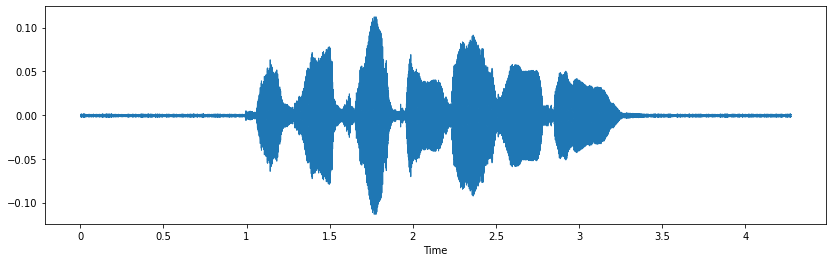

In [59]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)
print(sample_rate)

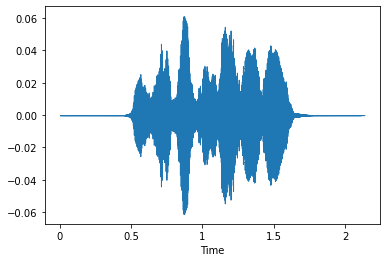

In [60]:
y, sr = librosa.load(path)
y_fast = librosa.effects.time_stretch(y, rate=2.0)
librosa.display.waveshow(y = y_fast, sr=sample_rate)
Audio(y_fast, rate=sample_rate)

# plt.figure(figsize=(14,4))


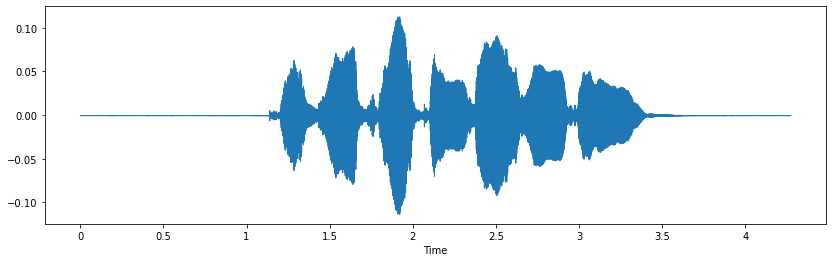

In [61]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

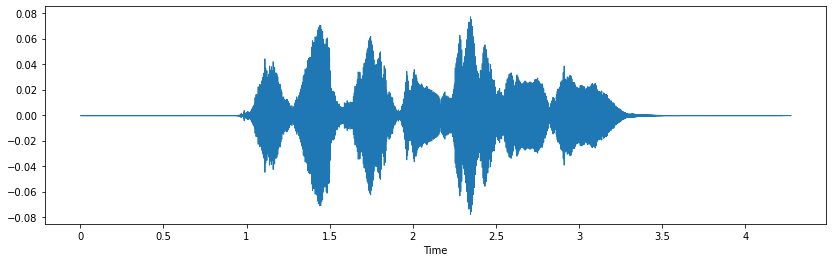

In [62]:
# x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
# y, sr = librosa.load(path)
y_pitch = librosa.effects.pitch_shift(y, sr = sr, n_steps = 0.5)
librosa.display.waveshow(y=y_pitch, sr=sample_rate)
Audio(y_pitch, rate=sample_rate)

In [63]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    # new_data = stretch(data)
    new_data = librosa.effects.time_stretch(y, rate=2.0)
    # data_stretch_pitch = pitch(new_data, sample_rate)
    data_stretch_pitch = librosa.effects.pitch_shift(y, sr = sr, n_steps = 3)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result


In [64]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [65]:
len(X), len(Y), data_path.Path.shape

(35202, 35202, (11734,))

In [66]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.149645  0.558029  0.441698  0.558767  0.560132  0.616601  0.681474   
1  0.192717  0.670136  0.541107  0.609080  0.622536  0.666254  0.721301   
2  0.215101  0.559383  0.542074  0.629517  0.695435  0.543775  0.524768   
3  0.161626  0.598819  0.450774  0.492581  0.509381  0.544281  0.690119   
4  0.215495  0.707687  0.580076  0.595096  0.616046  0.652849  0.757455   

          7         8         9  ...       153       154       155       156  \
0  0.561004  0.517133  0.430672  ...  0.000049  0.000031  0.000023  0.000027   
1  0.594994  0.572520  0.505292  ...  0.000470  0.000458  0.000447  0.000454   
2  0.543876  0.583669  0.738313  ...  0.000028  0.000033  0.000056  0.000035   
3  0.572829  0.609194  0.493884  ...  0.000051  0.000054  0.000034  0.000037   
4  0.629915  0.639704  0.564128  ...  0.001161  0.001204  0.001132  0.001203   

        157       158       159       160           161   labels  
0  0.000023  0.000022  0.000020  0.000008  6.683276e-07  neutral  
1  0.000437  0.000436  0.000454  0.000453  4.387346e-04  neutral  
2  0.000016  0.000009  0.000009  0.000003  2.596909e-07  neutral  
3  0.000036  0.000041  0.000041  0.000011  9.628016e-07  neutral  
4  0.001138  0.001161  0.001179  0.001152  1.103201e-03  neutral  

[5 rows x 163 columns]

In [67]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [68]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26401, 162), (26401, 8), (8801, 162), (8801, 8))

In [70]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26401, 162), (26401, 8), (8801, 162), (8801, 8))

In [71]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26401, 162, 1), (26401, 8), (8801, 162, 1), (8801, 8))

#Modelling

In [72]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 81, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0

In [73]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
413/413 [==============================] - 41s 100ms/step - loss: 1.8121 - accuracy: 0.2552 - val_loss: 1.6107 - val_accuracy: 0.3320
Epoch 2/50
413/413 [==============================] - 51s 122ms/step - loss: 1.5992 - accuracy: 0.3337 - val_loss: 1.5285 - val_accuracy: 0.3760
Epoch 3/50
413/413 [==============================] - 52s 126ms/step - loss: 1.5102 - accuracy: 0.3756 - val_loss: 1.4265 - val_accuracy: 0.4140
Epoch 4/50
413/413 [==============================] - 53s 128ms/step - loss: 1.4582 - accuracy: 0.3967 - val_loss: 1.4035 - val_accuracy: 0.4297
Epoch 5/50
413/413 [==============================] - 55s 133ms/step - loss: 1.4227 - accuracy: 0.4096 - val_loss: 1.3722 - val_accuracy: 0.4376
Epoch 6/50
413/413 [==============================] - 54s 130ms/step - loss: 1.3947 - accuracy: 0.4205 - val_loss: 1.3500 - val_accuracy: 0.4434
Epoch 7/50
413/413 [==============================] - 53s 129ms/step - loss: 1.3826 - accuracy: 0.4287 - val_loss: 1.3566 - val_ac

276/276 [==============================] - 4s 16ms/step - loss: 1.3938 - accuracy: 0.5021
Accuracy of our model on test data :  50.21020174026489 %


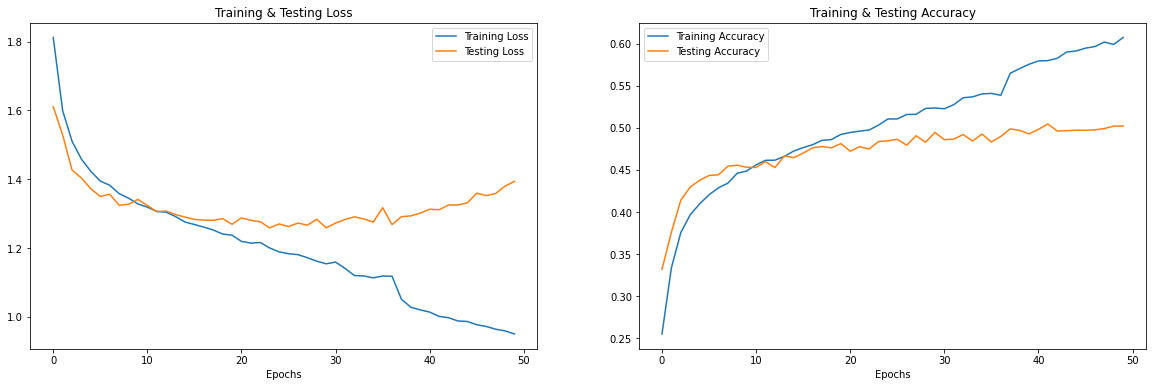

In [74]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [75]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [76]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0             fear          fear
1             fear          fear
2          disgust       disgust
3              sad          fear
4             fear         happy
5             fear          fear
6             fear         happy
7             fear           sad
8              sad          fear
9             fear           sad

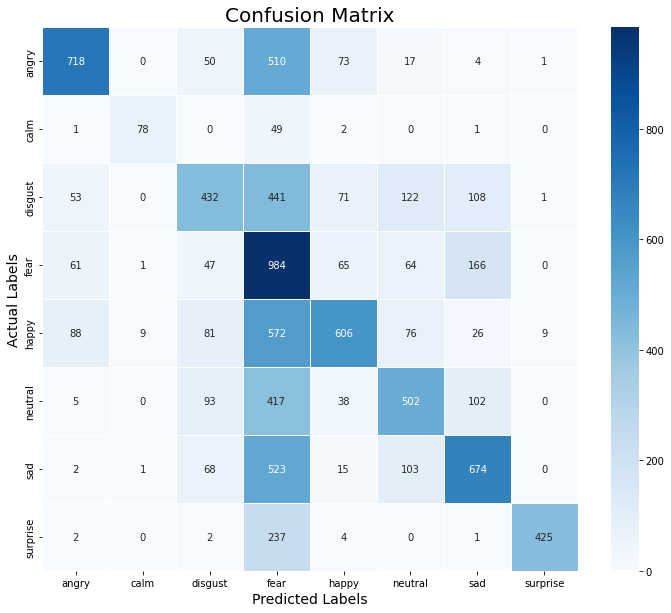

In [77]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.77      0.52      0.62      1373
        calm       0.88      0.60      0.71       131
     disgust       0.56      0.35      0.43      1228
        fear       0.26      0.71      0.38      1388
       happy       0.69      0.41      0.52      1467
     neutral       0.57      0.43      0.49      1157
         sad       0.62      0.49      0.55      1386
    surprise       0.97      0.63      0.77       671

    accuracy                           0.50      8801
   macro avg       0.67      0.52      0.56      8801
weighted avg       0.62      0.50      0.52      8801

